Project Name - Diwali Sales Analysis

In [25]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [56]:
# import csv file

df = pd.read_csv(r'C:/Users/USER/Desktop/3RI/Analytics/Project/Diwali_Sales/Diwali_Sales_Data.csv', encoding= 'unicode_escape')
print("Dataset Load Successfully")

Dataset Load Successfully


In [53]:
df.head() 

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [54]:
#Size of Data
df.shape

(11239, 13)

In [28]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [29]:
#Drop Null-valuees columns

df.drop(['Status', 'unnamed1'], axis=1, inplace=True)           #axis=1-> drop whole column, axis=0 ->drop whole row

In [30]:
#check for null values

pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [31]:
# drop null values

df.dropna(inplace=True) 

In [58]:
# change data type

df['Amount'] = df['Amount'].fillna(0).astype('int')

In [60]:
df['Amount'].dtypes 

dtype('int64')

In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [33]:
#rename column

df.rename(columns= {'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [34]:
# Describe() for specific columns

df[['Age', 'Orders', 'Amount']].describe()  # Half of the customers are younger than 33, and half are older. 
                                            # 75% of customers spent less than ₹12675,
                                            # and 25% spent more than ₹12675., It means that 25% of the customers placed 2 or fewer orders.
#The quartile values show that most customers are aged between 27 and 43, with a median age of 33. This means the majority are young to middle-aged.

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


### Gender

C:\Users\USER\AppData\Local\Temp\ipykernel_3940\4270685152.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(x = 'Gender',data = df,palette='magma')


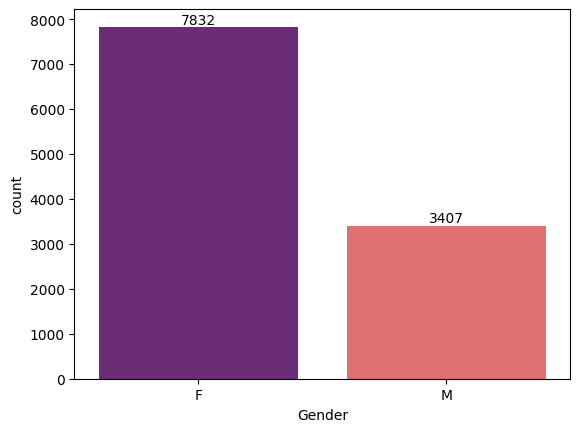

In [35]:
# plotting a bar chart for Gender and it's count

a = sns.countplot(x = 'Gender',data = df,palette='magma')

for bars in a.containers:
    a.bar_label(bars)   

<Axes: title={'center': 'Gender vs Total Amount'}, xlabel='Gender', ylabel='Amount'>

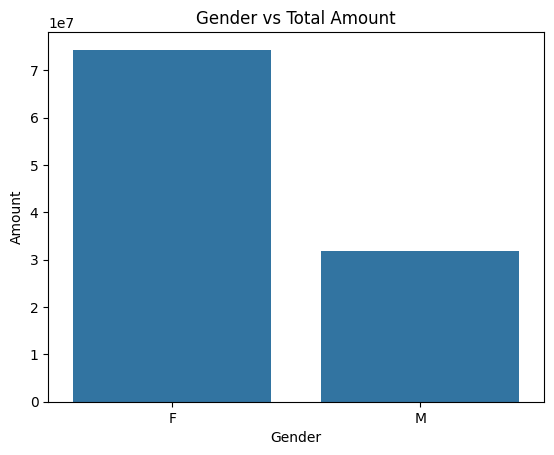

In [36]:
#plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.title('Gender vs Total Amount')

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

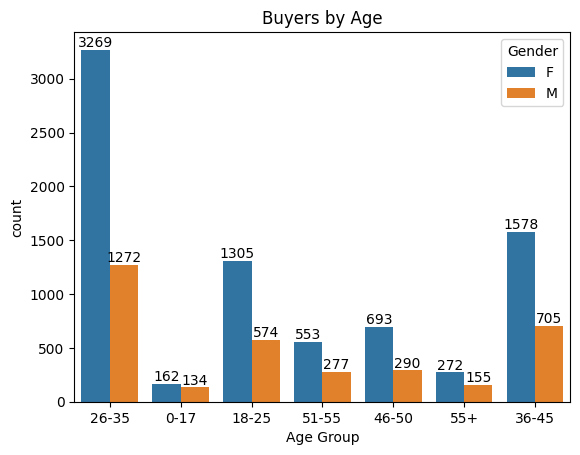

In [37]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
plt.title('Buyers by Age')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: title={'center': 'Revenue'}, xlabel='Age Group', ylabel='Amount'>

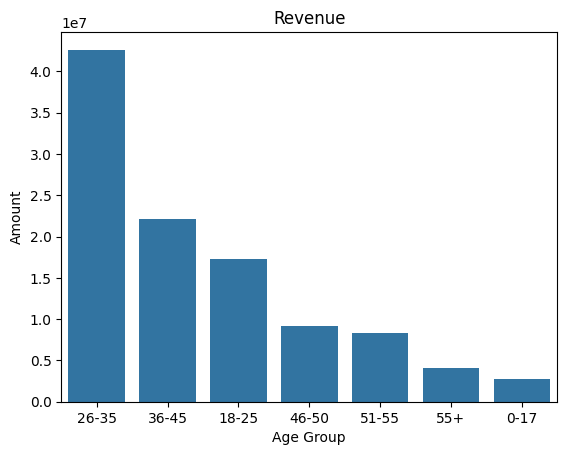

In [39]:
# Total Revenue vs Age Group

sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.title('Revenue')
sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

C:\Users\USER\AppData\Local\Temp\ipykernel_3940\2743105536.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'State',y= 'Orders',palette='magma')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Kerala'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Gujarat')])

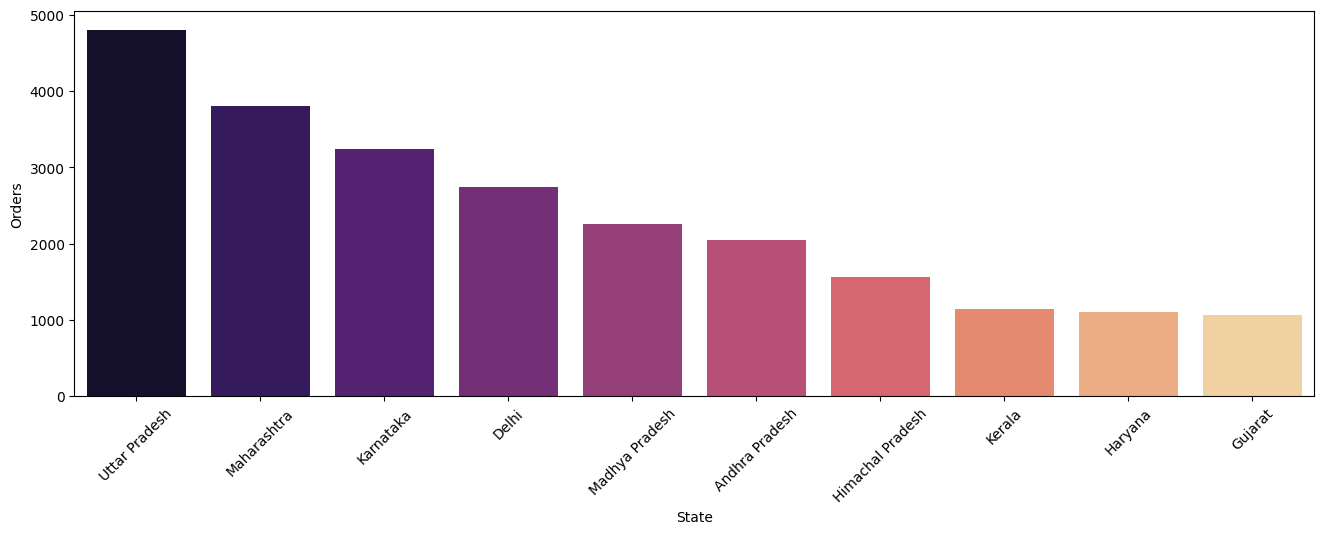

In [40]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
plt.figure(figsize=(16,5))
sns.barplot(data = sales_state, x = 'State',y= 'Orders',palette='magma')
plt.xticks(rotation=45)


C:\Users\USER\AppData\Local\Temp\ipykernel_3940\2790663722.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'State',y= 'Amount', palette = 'viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Haryana'),
  Text(8, 0, 'Bihar'),
  Text(9, 0, 'Gujarat')])

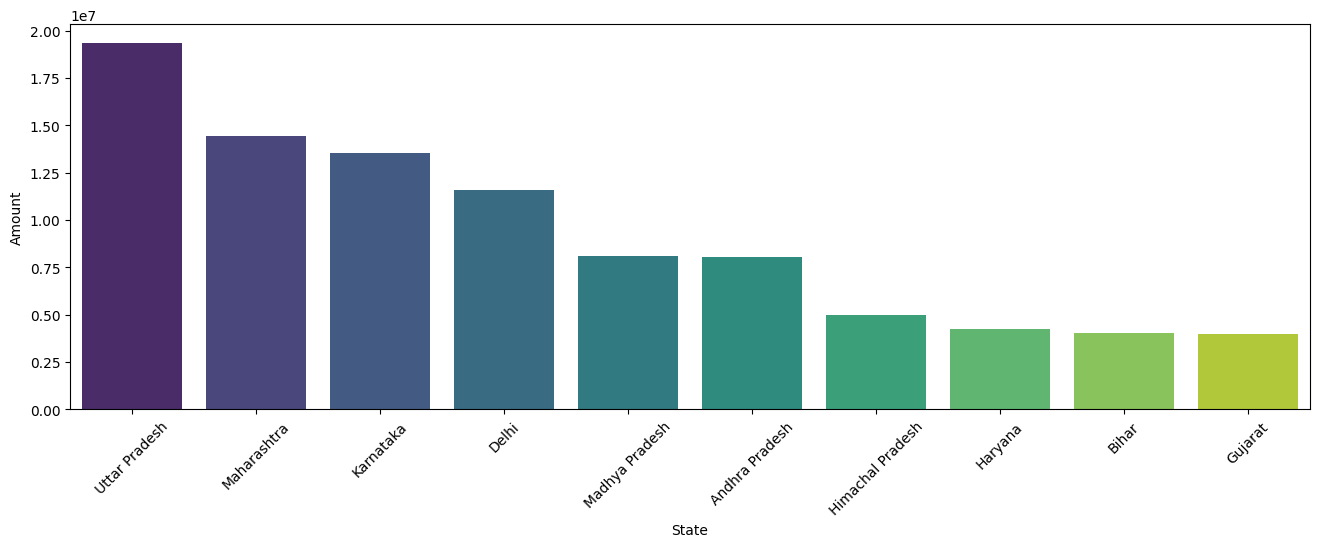

In [41]:
# total Revenue from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

plt.figure(figsize=(16,5))
sns.barplot(data = sales_state, x = 'State',y= 'Amount', palette = 'viridis')
plt.xticks(rotation=45)

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

C:\Users\USER\AppData\Local\Temp\ipykernel_3940\592962091.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(data = df, x = 'Marital_Status',palette='magma')


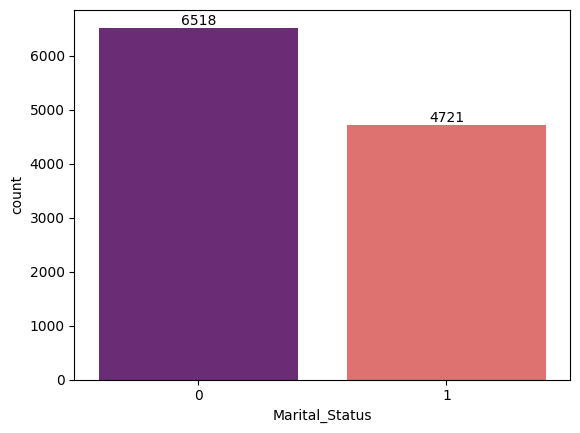

<Figure size 500x200 with 0 Axes>

In [42]:
a = sns.countplot(data = df, x = 'Marital_Status',palette='magma')

plt.figure(figsize=(5,2))
for bars in a.containers:
    a.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

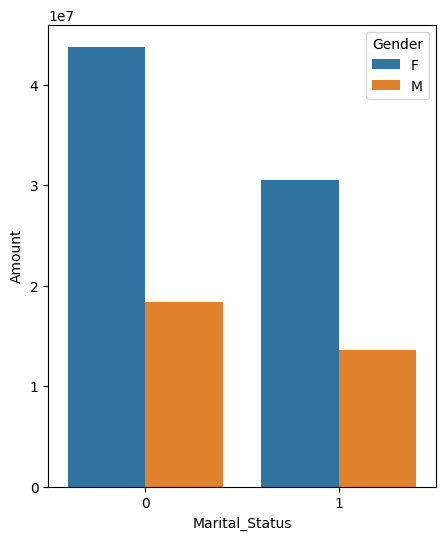

In [43]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize=(5,6))
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

C:\Users\USER\AppData\Local\Temp\ipykernel_3940\2156357206.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Occupation',palette='magma')


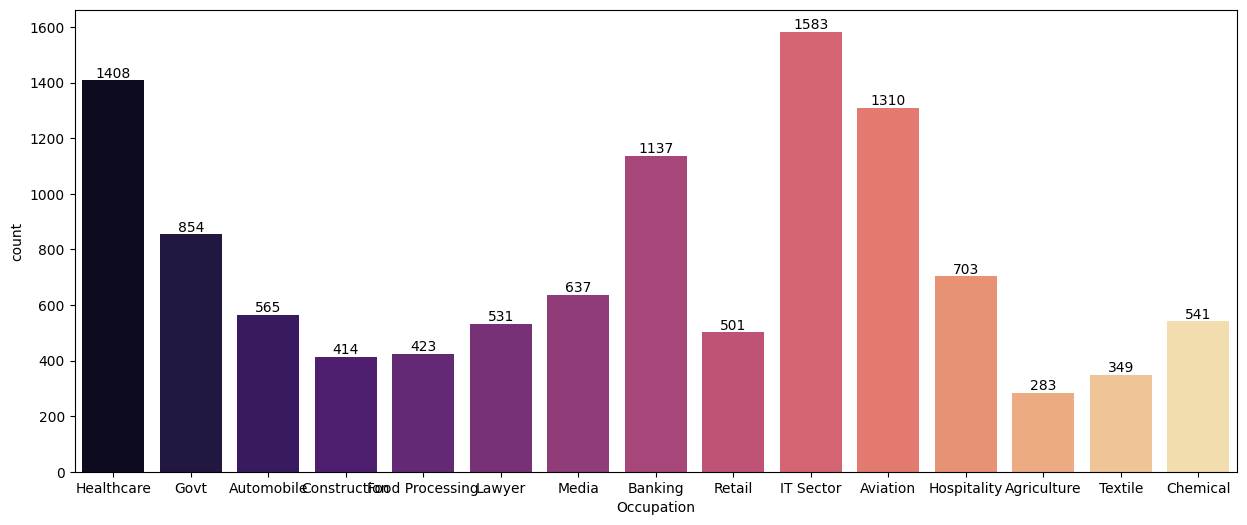

In [44]:
plt.figure(figsize=(15,6))
ax = sns.countplot(data = df, x = 'Occupation',palette='magma')

for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\USER\AppData\Local\Temp\ipykernel_3940\446302006.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount',palette='muted')


<Axes: xlabel='Occupation', ylabel='Amount'>

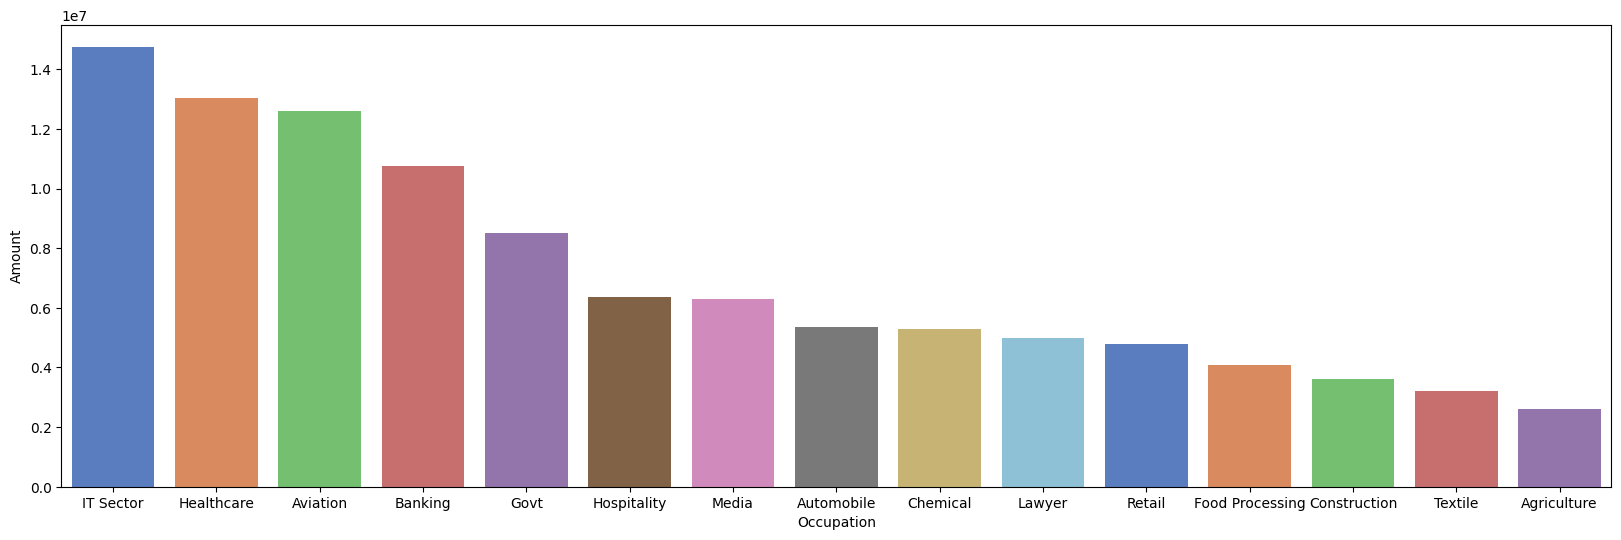

In [45]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize=(20,6))
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount',palette='muted')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

C:\Users\USER\AppData\Local\Temp\ipykernel_20768\1267886559.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Product_Category',palette='deep')


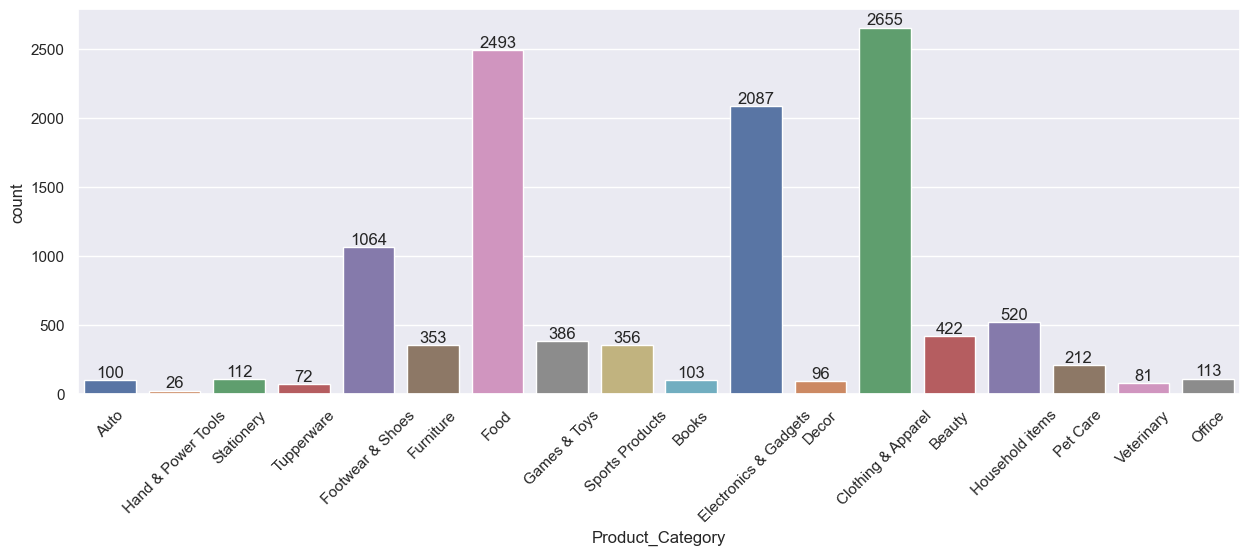

In [97]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data = df, x = 'Product_Category',palette='deep')
plt.xticks(rotation=45)

for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\USER\AppData\Local\Temp\ipykernel_3940\1450500845.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount',palette='icefire')


<Axes: xlabel='Product_Category', ylabel='Amount'>

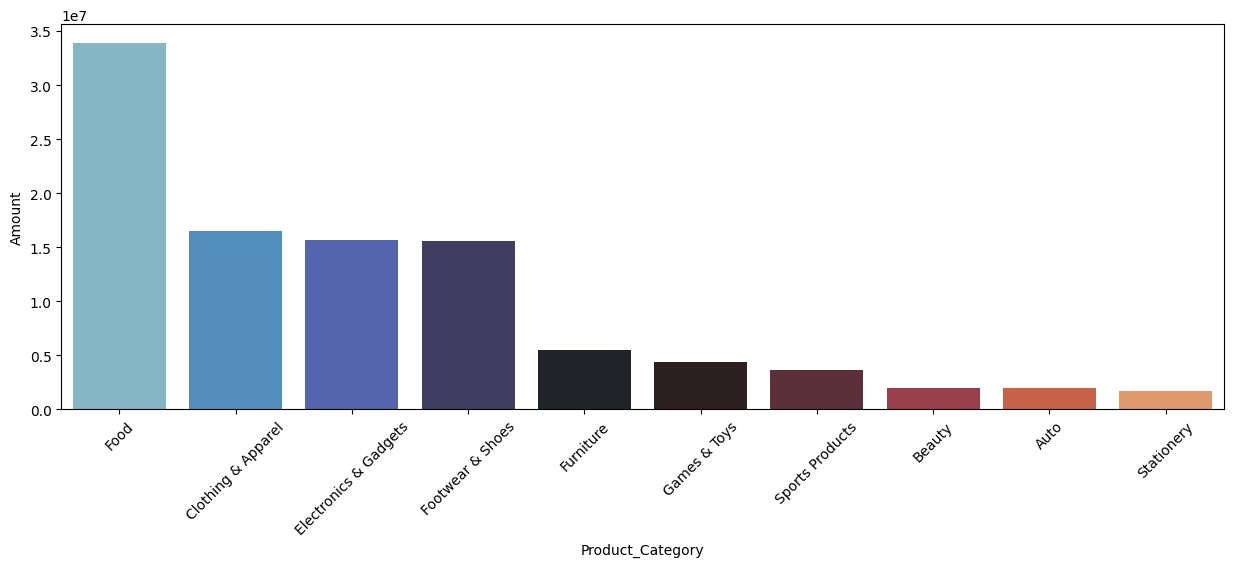

In [46]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount',palette='icefire')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

C:\Users\USER\AppData\Local\Temp\ipykernel_20768\2090610231.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders',palette='colorblind')


<Axes: xlabel='Product_ID', ylabel='Orders'>

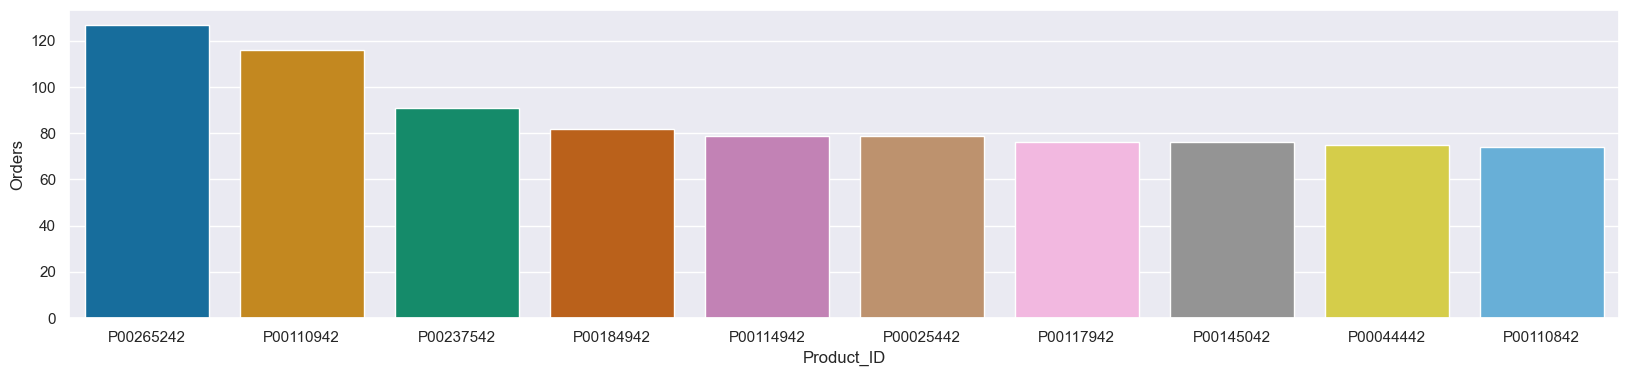

In [86]:
#Product ID over orders 
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,4)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders',palette='colorblind')

## Conclusion:

### 

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*

Thank you!


Regards- Amit Ghume